<br><h1>Analyzing #TravelMakesUs Campaign, by Marriott Hotels</h1>
<h4>Paulo Aragao</h4><br>
Hult International Business School<br>
Social Media Analytics for Business Intelligence<br><br><br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

# Introduction
COVID-19 brought many challenges to the world. The travel industry was one of the most affected.
With quanrantine orders, countries' borders were closed, flights were grounded and there was no more reason to fly. As vaccination rates increase across the United States, the country begins its recovery.
Millions of tourists that were forced to stay home are now able to book flights and resume their travel.
As the there is a clear pent-up of demand, hotels advertise heavily in hopes to grab customers' attention.

The Marriot hotel chain, with more than 7,600 hotels across the globe, launched a campaign through its rewards program Marriott Bonvoy: "Power of Travel"

According to their website, the intention is to call travelers to embrace the transformative power of travel as a vital pathway to growth, healing, and unity.

The campaign with the hashtag 'Travel Makes Us' was launched across all social media: Instagram, Facebook, Twitter and TikTok.

The objective here is to analyze the latest tweets mentioning the campaign, in order to bring insights as to people's reaction to it.
Tweets from the main Marriott accounts were excluded (i.e.: @MarriottBonvoy, @AmsMarriott, @mbonvoytraveler) so that the analysis can focus on customers reactions and not the company itself.
Some hotel brand accounts were kept (i.e.: @WHotels and @JWMarriott) because they rank as one of the top accounts that favorited tweets with the hashtag 'Travel Makes Us'. This demonstrates that the sub-brands help spread the word and therefore foster engagement.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

# Analysis & Code
## 1. Initiation of Code and Setting Up

In [1]:
#######################################
########   Import packages   ##########
#######################################

# Data & plot
import pandas as pd
import matplotlib.pyplot as plt

# Call Twitter
import tweepy as tw
import config_twitter # change it to yours

# Json, word clouds
import html
import json
import string
import re
from nltk import word_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob
from wordcloud import WordCloud


In [2]:
# establish Twitter API connection
auth = tw.OAuthHandler(config_twitter.consumer_key, config_twitter.consumer_secret)
auth.set_access_token(config_twitter.access_token, config_twitter.access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

user = api.verify_credentials()

In [3]:
# To check connecting API
user

User(_api=<tweepy.api.API object at 0x7f8e580aaf40>, _json={'id': 32462932, 'id_str': '32462932', 'name': 'Virgo Scorpio', 'screen_name': 'pauloaragao', 'location': 'San Francisco, CA', 'description': '', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 219, 'friends_count': 265, 'listed_count': 1, 'created_at': 'Fri Apr 17 16:14:24 +0000 2009', 'favourites_count': 354, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': False, 'statuses_count': 4745, 'lang': None, 'status': {'created_at': 'Thu Jul 08 05:42:10 +0000 2021', 'id': 1413010499218731009, 'id_str': '1413010499218731009', 'text': '@ZnPreto Sim… todo mundo se achando ator pornô sem nunca ter sido…', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'ZnPreto', 'name': 'PretoZn', 'id': 1258573387217227777, 'id_str': '1258573387217227777', 'indices': [0, 8]}], 'urls': []}, 'source': '<a href="http://twitter.com/downlo

In [4]:
# function to establish an initial API connection, respecting the rate limit
def connect_api_client(): # Change it to yours
    auth = tw.OAuthHandler(config_twitter.consumer_key, config_twitter.consumer_secret)
    auth.set_access_token(config_twitter.access_token, config_twitter.access_token_secret)
    # https://docs.tweepy.org/en/stable/getting_started.html#api
    api = tw.API(auth, wait_on_rate_limit=True)
    try:
        # returns False if credentials could not be verified
        api.verify_credentials()
        user = api.verify_credentials()
        if not user:
            raise("Credentials could not be verified: Please check config.py")
        print(f"Connected to Twitter API as {user.name}")
    except Exception as e:
        raise e
    return api

api = connect_api_client()

Connected to Twitter API as Virgo Scorpio


In [5]:
# construct a search query
## The word 'travel' was associated with the main hashtag to avoid wrong tweets, not related to the campaign

query = '#travelmakesus AND "travel" -filter:retweets'

In [6]:
# Number of tweets pulled for analysis

ntweets = 1000
tweets = [tweet._json for tweet in tw.Cursor(api.search, q=query, lang="en", tweet_mode='extended').items(ntweets)]

In [7]:
# Example of tweet
tweets[0]

{'created_at': 'Fri Jul 09 20:43:05 +0000 2021',
 'id': 1413599610959015938,
 'id_str': '1413599610959015938',
 'full_text': 'Would you sleep in a bubble hotel under the northern lights? 😍\n\nIceland is one of the best places in the world to witness the wonder that is the northern lights.\n📷: @anthonykdo \n#travel #travelblog #TravelMakesUs #travelers #iceland #traveltribe #travelislife #travelcommunity https://t.co/0qhB5K0BcO',
 'truncated': False,
 'display_text_range': [0, 276],
 'entities': {'hashtags': [{'text': 'travel', 'indices': [178, 185]},
   {'text': 'travelblog', 'indices': [186, 197]},
   {'text': 'TravelMakesUs', 'indices': [198, 212]},
   {'text': 'travelers', 'indices': [213, 223]},
   {'text': 'iceland', 'indices': [224, 232]},
   {'text': 'traveltribe', 'indices': [233, 245]},
   {'text': 'travelislife', 'indices': [246, 259]},
   {'text': 'travelcommunity', 'indices': [260, 276]}],
  'symbols': [],
  'user_mentions': [{'screen_name': 'anthonykdo',
    'name': 'Antho

In [8]:
# save tweets data to json file
file_out = f"raw_tweet_data_{ntweets}.json"
with open(file_out, mode='w') as f:
    f.write(json.dumps(tweets, indent=2))

In [9]:
# First collect the data in json-file; specify file name here. Number of queries adjusted
fjson = 'raw_tweet_data_1000.json'
# read json file with tweets data

with open(fjson) as file:
    data = json.load(file)
len(data)

202

In [10]:
#defining the Data Frame of Tweets
df_tweets0 = pd.DataFrame([t['full_text'] for t in data], columns=['text'])

# add selected columns from tweet data fields
df_tweets0['retweets'] = [t['retweet_count'] for t in data]
df_tweets0['favorites'] = [t['favorite_count'] for t in data]
df_tweets0['user'] = [t['user']['screen_name'] for t in data]

# Check the dataframe df_tweets0
df_tweets0

,text,retweets,favorites,user
0,Would you sleep in a bubble hotel under the no...,0,0,triploaf
1,The Official DAWNLAND® ES Monogram Suitcase Tr...,0,0,themonograms
2,I'm just waiting for the time we can travel 😖 ...,0,1,Itzchlxe02
3,"Open July 15th. In Millvale, just mins from th...",0,0,NatureLife_Camp
4,We offer exclusive deals on family holiday pac...,1,0,AshTravelsUK
...,...,...,...,...
197,"As a visitor to Hawaii, you’ll want to malama ...",0,0,mbonvoytraveler
198,Sometimes you just need a beach day 🏖 \n\n#rei...,1,4,ReistijdNL
199,Follow these tips to be a responsible — and mo...,0,1,mbonvoytraveler
200,Summer is here and it’s time to travel. Let’s ...,1,2,TEDpartners


In [100]:
# filter out tweets from a specific users
## User @SPGFamilyAdvNet was included to be filtered because it has nothing to do with the campaign, affecting the results.

users_remove = ['MarriottBonvoy', 'AmsMarriott', 'SPGFamilyAdvNet', 'mbonvoytraveler']
df_tweets = df_tweets0[~df_tweets0['user'].isin(users_remove)].copy()

In [101]:
# Check the dataframe df_tweets
df_tweets

,text,retweets,favorites,user
0,Would you sleep in a bubble hotel under the northern lights? 😍\n\nIceland is one of the best places in the world to witness the wonder that is the northern lights.\n📷: @anthonykdo \n#travel #travelblog #TravelMakesUs #travelers #iceland #traveltribe #travelislife #travelcommunity https://t.co/0qhB5K0BcO,0,0,triploaf
1,The Official DAWNLAND® ES Monogram Suitcase Travel Luggage #yournamebrand #allmonogrammatter #friday #weekendvibes #TravelMakesUs #free https://t.co/npU6UONa48 via @zazzle,0,0,themonograms
2,I'm just waiting for the time we can travel 😖 \n#Travel #TravelMakesUs,0,1,Itzchlxe02
3,"Open July 15th. In Millvale, just mins from the beach!\n\nBook thru Airbnb, (we also except etransfer)\n\n#pei #beach #vacation #2021 #CampCamp #camping #TravelMakesUs #Travel https://t.co/gqlFl7IjHQ",0,0,NatureLife_Camp
4,"We offer exclusive deals on family holiday packages. For enquiries and bookings, please give us a call on 02476769768.\n\n#AshTravels #travel #holidays #UK #trip #TravelMakesUs #travelphotography #travelblogger #Wanderlust #flights #Offers #Deals https://t.co/QGRWcamss4",1,0,AshTravelsUK
...,...,...,...,...
193,Can't wait for travel restrictions to be lifted soon. This pandemic has taken so much from all of us. #TravelMakesUs connect with our loved ones again. https://t.co/CP8RY5LGzF,0,1,Andrew_F_Lee
194,Take vacations and go as many places as you can! 💭\n\n#reistijd #genieten #vakantie #travel #spain #reizen #travelsafe #travelmakesus #travelling #opvakantie ##travelislife #happy #summer #summervibes #traveladdict #traveltheworld #travelnow #reizen #reisveilig #evenweg #memories https://t.co/l5KMylqu16,2,6,ReistijdNL
196,Marriott Bonvoy makes TikTok debut with global Power of Travel campaign:\n\n👉🏼 Read the full story:\n\n https://t.co/idUefdKf1F\n\n#influencermarketing #influencer #tiktok #TravelMakesUs #72andSunny \n\n@TikTok @72andSunny @hbomax https://t.co/MxbOZsqIO3,0,0,influenceweek
198,Sometimes you just need a beach day 🏖 \n\n#reistijd #vakantie #ibiza #ibizavibes #vakantie #vakantieaanzee #holiday #travel #reizen #travelmakesus #travelsafe #traveling #traveltheworld #spain #playadenbossa #strand #zee #zon #beach #beachlife #genieten https://t.co/cKQrQrLyS6,1,4,ReistijdNL


In [102]:
# text cleaning function
stop_words = set(stopwords.words('english'))

# strictly speaking, this is a closure: uses a wider-scope variable stop_words
# (disregard this note if you are a Python beginner)
def text_cleanup(s):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', s)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase and tokenize
    wt = word_tokenize(s_noemoji.lower())
    
    # filter word-tokens
    wt_filt = [w for w in wt if (w not in stop_words) and (w not in string.punctuation) and (w.isalnum())]
    
    # return clean string
    return ' '.join(wt_filt)


In [103]:
# add clean text col
df_tweets['text_clean'] = df_tweets['text'].apply(text_cleanup)
df_tweets

,text,retweets,favorites,user,text_clean
0,Would you sleep in a bubble hotel under the northern lights? 😍\n\nIceland is one of the best places in the world to witness the wonder that is the northern lights.\n📷: @anthonykdo \n#travel #travelblog #TravelMakesUs #travelers #iceland #traveltribe #travelislife #travelcommunity https://t.co/0qhB5K0BcO,0,0,triploaf,would sleep bubble hotel northern lights iceland one best places world witness wonder northern lights anthonykdo travel travelblog travelmakesus travelers iceland traveltribe travelislife travelcommunity
1,The Official DAWNLAND® ES Monogram Suitcase Travel Luggage #yournamebrand #allmonogrammatter #friday #weekendvibes #TravelMakesUs #free https://t.co/npU6UONa48 via @zazzle,0,0,themonograms,official dawnland es monogram suitcase travel luggage yournamebrand allmonogrammatter friday weekendvibes travelmakesus free via zazzle
2,I'm just waiting for the time we can travel 😖 \n#Travel #TravelMakesUs,0,1,Itzchlxe02,waiting time travel travel travelmakesus
3,"Open July 15th. In Millvale, just mins from the beach!\n\nBook thru Airbnb, (we also except etransfer)\n\n#pei #beach #vacation #2021 #CampCamp #camping #TravelMakesUs #Travel https://t.co/gqlFl7IjHQ",0,0,NatureLife_Camp,open july 15th millvale mins beach book thru airbnb also except etransfer pei beach vacation 2021 campcamp camping travelmakesus travel
4,"We offer exclusive deals on family holiday packages. For enquiries and bookings, please give us a call on 02476769768.\n\n#AshTravels #travel #holidays #UK #trip #TravelMakesUs #travelphotography #travelblogger #Wanderlust #flights #Offers #Deals https://t.co/QGRWcamss4",1,0,AshTravelsUK,offer exclusive deals family holiday packages enquiries bookings please give us call 02476769768 ashtravels travel holidays uk trip travelmakesus travelphotography travelblogger wanderlust flights offers deals
...,...,...,...,...,...
193,Can't wait for travel restrictions to be lifted soon. This pandemic has taken so much from all of us. #TravelMakesUs connect with our loved ones again. https://t.co/CP8RY5LGzF,0,1,Andrew_F_Lee,ca wait travel restrictions lifted soon pandemic taken much us travelmakesus connect loved ones
194,Take vacations and go as many places as you can! 💭\n\n#reistijd #genieten #vakantie #travel #spain #reizen #travelsafe #travelmakesus #travelling #opvakantie ##travelislife #happy #summer #summervibes #traveladdict #traveltheworld #travelnow #reizen #reisveilig #evenweg #memories https://t.co/l5KMylqu16,2,6,ReistijdNL,take vacations go many places reistijd genieten vakantie travel spain reizen travelsafe travelmakesus travelling opvakantie travelislife happy summer summervibes traveladdict traveltheworld travelnow reizen reisveilig evenweg memories
196,Marriott Bonvoy makes TikTok debut with global Power of Travel campaign:\n\n👉🏼 Read the full story:\n\n https://t.co/idUefdKf1F\n\n#influencermarketing #influencer #tiktok #TravelMakesUs #72andSunny \n\n@TikTok @72andSunny @hbomax https://t.co/MxbOZsqIO3,0,0,influenceweek,marriott bonvoy makes tiktok debut global power travel campaign read full story influencermarketing influencer tiktok travelmakesus 72andsunny tiktok 72andsunny hbomax
198,Sometimes you just need a beach day 🏖 \n\n#reistijd #vakantie #ibiza #ibizavibes #vakantie #vakantieaanzee #holiday #travel #reizen #travelmakesus #travelsafe #traveling #traveltheworld #spain #playadenbossa #strand #zee #zon #beach #beachlife #genieten https://t.co/cKQrQrLyS6,1,4,ReistijdNL,sometimes need beach day reistijd vakantie ibiza ibizavibes vakantie vakantieaanzee holiday travel reizen travelmakesus travelsafe traveling traveltheworld spain playadenbossa strand zee zon beach beachlife genieten


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

## 2. Highest and Lowest Sentiments Analysis

In [104]:
# sentiment analysis
def sentim_polarity(s):
    return TextBlob(s).sentiment.polarity

def sentim_subject(s):
    return TextBlob(s).sentiment.subjectivity

df_tweets['polarity'] = df_tweets['text_clean'].apply(sentim_polarity)
df_tweets['subjectivity'] = df_tweets['text_clean'].apply(sentim_subject)
df_tweets

,text,retweets,favorites,user,text_clean,polarity,subjectivity
0,Would you sleep in a bubble hotel under the northern lights? 😍\n\nIceland is one of the best places in the world to witness the wonder that is the northern lights.\n📷: @anthonykdo \n#travel #travelblog #TravelMakesUs #travelers #iceland #traveltribe #travelislife #travelcommunity https://t.co/0qhB5K0BcO,0,0,triploaf,would sleep bubble hotel northern lights iceland one best places world witness wonder northern lights anthonykdo travel travelblog travelmakesus travelers iceland traveltribe travelislife travelcommunity,1.000,0.300
1,The Official DAWNLAND® ES Monogram Suitcase Travel Luggage #yournamebrand #allmonogrammatter #friday #weekendvibes #TravelMakesUs #free https://t.co/npU6UONa48 via @zazzle,0,0,themonograms,official dawnland es monogram suitcase travel luggage yournamebrand allmonogrammatter friday weekendvibes travelmakesus free via zazzle,0.400,0.800
2,I'm just waiting for the time we can travel 😖 \n#Travel #TravelMakesUs,0,1,Itzchlxe02,waiting time travel travel travelmakesus,0.000,0.000
3,"Open July 15th. In Millvale, just mins from the beach!\n\nBook thru Airbnb, (we also except etransfer)\n\n#pei #beach #vacation #2021 #CampCamp #camping #TravelMakesUs #Travel https://t.co/gqlFl7IjHQ",0,0,NatureLife_Camp,open july 15th millvale mins beach book thru airbnb also except etransfer pei beach vacation 2021 campcamp camping travelmakesus travel,0.000,0.500
4,"We offer exclusive deals on family holiday packages. For enquiries and bookings, please give us a call on 02476769768.\n\n#AshTravels #travel #holidays #UK #trip #TravelMakesUs #travelphotography #travelblogger #Wanderlust #flights #Offers #Deals https://t.co/QGRWcamss4",1,0,AshTravelsUK,offer exclusive deals family holiday packages enquiries bookings please give us call 02476769768 ashtravels travel holidays uk trip travelmakesus travelphotography travelblogger wanderlust flights offers deals,0.100,0.000
...,...,...,...,...,...,...,...
193,Can't wait for travel restrictions to be lifted soon. This pandemic has taken so much from all of us. #TravelMakesUs connect with our loved ones again. https://t.co/CP8RY5LGzF,0,1,Andrew_F_Lee,ca wait travel restrictions lifted soon pandemic taken much us travelmakesus connect loved ones,0.450,0.500
194,Take vacations and go as many places as you can! 💭\n\n#reistijd #genieten #vakantie #travel #spain #reizen #travelsafe #travelmakesus #travelling #opvakantie ##travelislife #happy #summer #summervibes #traveladdict #traveltheworld #travelnow #reizen #reisveilig #evenweg #memories https://t.co/l5KMylqu16,2,6,ReistijdNL,take vacations go many places reistijd genieten vakantie travel spain reizen travelsafe travelmakesus travelling opvakantie travelislife happy summer summervibes traveladdict traveltheworld travelnow reizen reisveilig evenweg memories,0.650,0.750
196,Marriott Bonvoy makes TikTok debut with global Power of Travel campaign:\n\n👉🏼 Read the full story:\n\n https://t.co/idUefdKf1F\n\n#influencermarketing #influencer #tiktok #TravelMakesUs #72andSunny \n\n@TikTok @72andSunny @hbomax https://t.co/MxbOZsqIO3,0,0,influenceweek,marriott bonvoy makes tiktok debut global power travel campaign read full story influencermarketing influencer tiktok travelmakesus 72andsunny tiktok 72andsunny hbomax,0.175,0.275
198,Sometimes you just need a beach day 🏖 \n\n#reistijd #vakantie #ibiza #ibizavibes #vakantie #vakantieaanzee #holiday #travel #reizen #travelmakesus #travelsafe #traveling #traveltheworld #spain #playadenbossa #strand #zee #zon #beach #beachlife #genieten https://t.co/cKQrQrLyS6,1,4,ReistijdNL,sometimes need beach day reistijd vakantie ibiza ibizavibes vakantie vakantieaanzee holiday travel reizen travelmakesus travelsafe traveling traveltheworld spain playadenbossa strand zee zon beach beachlife genieten,0.000,0.000


In [105]:
# Visualizing the entire tweet as opposed to limited characters from Python

pd.set_option('display.max_colwidth', None)
df_tweets['text']

0      Would you sleep in a bubble hotel under the northern lights? 😍\n\nIceland is one of the best places in the world to witness the wonder that is the northern lights.\n📷: @anthonykdo \n#travel #travelblog #TravelMakesUs #travelers #iceland #traveltribe #travelislife #travelcommunity https://t.co/0qhB5K0BcO
1                                                                                                                                           The Official DAWNLAND® ES Monogram Suitcase Travel Luggage #yournamebrand #allmonogrammatter #friday #weekendvibes #TravelMakesUs #free https://t.co/npU6UONa48 via @zazzle
2                                                                                                                                                                                                                                               I'm just waiting for the time we can travel 😖  \n#Travel #TravelMakesUs
3                                                               

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

### 2.1 Highest Sentiment Analysis

According to the Top 20 sentiment tweets above, we can see that users are mostly travel bloggers, sub-brands or travel agencies.

They focus on showcasing a specific destination or hotel, in hopes to encourage customers to visit their websites, book the travel or engage with likes or comments.

These twitter users used the hashtag, aware of the fact that it would generate more traffic to their pages, given the broad reach of Marriott and its campaigns in general.

In [106]:
# Ordering top 20 tweets by polarity

df_tweets.sort_values(by='polarity', ascending=False).head(20)

,text,retweets,favorites,user,text_clean,polarity,subjectivity
0,Would you sleep in a bubble hotel under the northern lights? 😍\n\nIceland is one of the best places in the world to witness the wonder that is the northern lights.\n📷: @anthonykdo \n#travel #travelblog #TravelMakesUs #travelers #iceland #traveltribe #travelislife #travelcommunity https://t.co/0qhB5K0BcO,0,0,triploaf,would sleep bubble hotel northern lights iceland one best places world witness wonder northern lights anthonykdo travel travelblog travelmakesus travelers iceland traveltribe travelislife travelcommunity,1.000000,0.300000
12,Around the world in 80 seconds! The best we can do atm. Here's how I did it. #travel #TravelMakesUs #Traveller #travelblogger https://t.co/esV60CzyRL,0,3,moreratresa,around world 80 seconds best atm travel travelmakesus traveller travelblogger,1.000000,0.300000
50,Grab the best day use hotels in Pune!!\nhttps://t.co/9BRigjNvcN\n#hotel #hotels #PUNE #couples #businesstravel #TravelMakesUs #backpacking #bag2bag #travel #travelblogger https://t.co/Ks98e8dMTH,1,1,bag2bag_care,grab best day use hotels pune hotel hotels pune couples businesstravel travelmakesus backpacking bag2bag travel travelblogger,1.000000,0.300000
46,Adding all of these islands to my travel bucket list! The 11 best islands in #Thailand - https://t.co/Dncc5pfLQs via @cntraveller #TravelMakesUs #Travelgoal,0,0,Iamracheljlloyd,adding islands travel bucket list 11 best islands thailand via cntraveller travelmakesus travelgoal,1.000000,0.300000
56,"Who would you take here? 😍\n\nLocated at the foot of the Alps, Lake Como provides one of the most picturesque sceneries in the world. \n📽: @lakecomo_boat \n\n#travel #travelblogger #lakecomo #Italy #TravelMakesUs #explorepage #vacationmode #NaturePhotography #beautiful #travelphoto https://t.co/q020cMD4Hf",0,1,triploaf,would take located foot thealps lake como provides one picturesque sceneries world travel travelblogger lakecomo italy travelmakesus explorepage vacationmode naturephotography beautiful travelphoto,0.850000,1.000000
180,A #tbt to our trip to #Yorkshire! Such a beautiful part of England. 🏴󠁧󠁢󠁥󠁮󠁧󠁿 Watch our travel video here: Travel England | York and North York Moors National Park https://t.co/tugntYXlrx. Subscribe and share 🙏🏻 #TravelTuesday #travel #TravelMakesUs #gaytravel #England https://t.co/PIDBEJCYYG,2,23,LukeandTylerTr1,tbt trip yorkshire beautiful part england watch travel video travel england york north york moors national park subscribe share traveltuesday travel travelmakesus gaytravel england,0.850000,1.000000
128,"#TravelMakesUs a part of the exceptional. Today, we delve into how travel sparks the pursuit of the exquisite with @MarriottBonvoy. https://t.co/ZrV3zipEe2",1,11,stregishotels,travelmakesus part exceptional today delve travel sparks pursuit exquisite marriottbonvoy,0.833333,1.000000
68,"As the #travel industry digitizes and evolves, so does the complexity of running your business. \n\nFlywire provides your customers with a streamlined way to pay, so you can focus on building unforgettable experiences. https://t.co/Udv6SMnZEJ #TravelMakesUs #TravelByFlywire https://t.co/SkwKdFFERt",0,2,Flywire,travel industry digitizes evolves complexity running business flywire provides customers streamlined way pay focus building unforgettable experiences travelmakesus travelbyflywire,0.800000,1.000000
73,Happy hump day everyone! Just 2 more days until it's the weekend. Has anyone planned a weekend getaway yet? #Travel #TravelMakesUs #weekendvibes #Weekend,0,0,FreeSpiritSocia,happy hump day everyone 2 days weekend anyone planned weekend getaway yet travel travelmakesus weekendvibes weekend,0.800000,1.000000
120,How does travel make you #LiveExquisite? Share your favorite moments from the world of the Best Address. #TravelMakesUs https://t.co/cfxpSZmzPH,0,1,stregishotels,travel make liveexquisite share favorite moments world best address travelmakesus,0.750000,0.650000


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

### 2.2 Lowest Sentiment Analysis

According to the Bottom 20 sentiment tweets above, we can see that most of them are related to COVID-19. Travel restrictions, closing of borders, as explained before are the main reasons for the negative polarity.

Some others categorized as negative polarity are not actually so. 
This is good indication that training the machine learning is essential so that the results are as clean as possible. Even after filtering some users to get the best results, there still some spillover of bad data.



In [107]:
# Ordering bottom 20 tweets by polarity

df_tweets.sort_values(by='polarity', ascending=True).head(20)

,text,retweets,favorites,user,text_clean,polarity,subjectivity
124,"#TravelMakesUs \nBut ""Us"" are prohibited from ""travel"".\n(Keep'em at home &amp; stupid.)",0,3,jknordlander,travelmakesus us prohibited travel home stupid,-0.800000,1.000000
200,"Summer is here and it’s time to travel. Let’s take a day trip to Antarctica with those who braved the cold so you don’t have to: @kastacholamine, @PaulNicklen @ZariaForman, @chrisburkard, @crevassse, @RadioGlaciology, @robertswan2041 \n#TravelMakesUs\nhttps://t.co/PSaLfXN4NB",1,2,TEDpartners,summer time travel lets take day trip antarctica braved cold dont kastacholamine paulnicklen zariaforman chrisburkard crevassse radioglaciology robertswan2041 travelmakesus,-0.600000,1.000000
10,THOUGHT PROVOKING PIECE\nThe travel writing genre is often criticised for its unfair treatment of the “travellee” – the people encountered by the narrator during a journey. \n#travel #travelwriting #TravelMakesUs \n\nhttps://t.co/qtMeHPSRtW,0,0,WritersH,thought provoking piece travel writing genre often criticised unfair treatment travellee people encountered narrator journey travel travelwriting travelmakesus,-0.500000,1.000000
41,The demand for flights has decreased by 63% compared to 2019\nhttps://t.co/mmpUxOqmGb\n#Trending #TrendingNow #flightattendant #travel #TravelMakesUs #NewsUpdate,2,2,talcomcom,demand flights decreased 63 compared 2019 trending trendingnow flightattendant travel travelmakesus newsupdate,-0.400000,0.700000
39,@FerroTV I am deeply sorry for your loss and the pain you had to suffer due to failed US travel policies. It’s inhumane and unacceptable to treat legal residents with such disparity. @PeteButtigieg please change the policy! #TravelRestrictions #TravelMakesUs #ustravelban,0,0,TMexan,ferrotv deeply sorry loss pain suffer due failed us travel policies inhumane unacceptable treat legal residents disparity petebuttigieg please change policy travelrestrictions travelmakesus ustravelban,-0.365000,0.555000
95,"@Budget As I’ve said multiple times, this is NOT a solution but #thankyou for continuing to suggest it. Terrible policy for a company that is supposedly a global #brand. #TravelTuesday #TravelMakesUs #Travel #branding",1,1,DsgrntldPenguin,budget ive said multiple times solution thankyou continuing suggest terrible policy company supposedly global brand traveltuesday travelmakesus travel branding,-0.333333,0.333333
72,How sad to see most of the shops and eatery’s in @NCLairport closed. Travel has been decimated 😔 #TravelRestrictions #TravelMakesUs #EnoughIsEnough,0,1,studywithwine,sad see shops eaterys nclairport closed travel decimated travelrestrictions travelmakesus enoughisenough,-0.300000,0.550000
164,Do you agree with the trending #TravelMakesUs? Does #travel make us or just take us? It certainly can make us stronger &amp; more understanding but if it goes bad then our reaction makes us. Get #insured for your #travels w/@InsuredNomads https://t.co/MCPaLgluxx #nomads #digitalnomad,0,1,InsuredNomads,agree trending travelmakesus travel make us take us certainly make us stronger understanding goes bad reaction makes us get insured travels insurednomads nomads digitalnomad,-0.242857,0.619048
76,travel makes us peace. even melancholy. always feel lonely and small. #TravelMakesUs https://t.co/51InH8pQpl,1,0,KH41926416,travel makes us peace even melancholy always feel lonely small travelmakesus,-0.175000,0.550000
153,@purviparwani Just a little travel shy up here in 🇨🇦 for the moment but our local hiking trips have been eye opening in discovering the beauty of our own province just 2 hrs north of Toronto. This beauty was unmapped in the middle of nowhere!!\n#TravelMakesUs\n#BruceTrail https://t.co/UI5FtQzETP,0,5,Kidsdoc1Rick,purviparwani little travel shy moment local hiking trips eye opening discovering beauty province 2 hrs north toronto beauty unmapped middle nowhere travelmakesus brucetrail,-0.171875,0.250000


In [89]:
# most favorited content
df_tweets.sort_values(by='favorites', ascending=False).head(20)

,text,retweets,favorites,user,text_clean,polarity,subjectivity
162,"""Travel isn’t always pretty. It isn’t always comfortable. Sometimes it hurts, it even breaks your heart. But that’s OK. The journey changes you; it should change you. You take something with you. Hopefully, you leave something good behind.“ -Anthony Bourdain💖\n#TravelMakesUs https://t.co/A3Tlo7APUX",54,184,StephsMundo,travel isnt always pretty isnt always comfortable sometimes hurts even breaks heart thats journey changes change take something hopefully leave something good behind bourdain travelmakesus,0.237500,0.775000
115,Travel has helped shape me into a better person. Always reminding me that there is more out there than just my tiny perspective. What travel has transformed you? @MarriottBonvoy #TravelMakesUs #ad https://t.co/agJo7kXSIM,13,148,coreywolfen,travel helped shape better person always reminding tiny perspective travel transformed marriottbonvoy travelmakesus ad,0.250000,0.500000
140,Tuesday's are made for #kissing it's #nationalkissingday #travel \n#tuesdayvibe #TravelMakesUs \n #KissDay #kissing #Favorite #PermissiontoDance #LasVegas #lasvegasstrip #Entertainment https://t.co/O9vf1cC61k,11,133,VIPAprilLuv,tuesday made kissing nationalkissingday travel tuesdayvibe travelmakesus kissday kissing favorite permissiontodance lasvegas lasvegasstrip entertainment,0.500000,1.000000
61,"I soooooo wana travel, US, UK, Europe all over the world... #GoCoronaGo \n#lovetravelling #ecploretheworld #TravelMakesUs #EnjoyingEverydayLife https://t.co/61PddrBb1Y",2,106,MishalBukhari5,soooooo wana travel us uk europe world gocoronago lovetravelling ecploretheworld travelmakesus enjoyingeverydaylife,0.000000,0.000000
171,"#TravelMakesUs adaptable &amp; wiser. The more I travel, the more wiser, accepting of other cultures &amp; customs. https://t.co/6twGJAcgQo",13,70,LoveCat_Mickey,travelmakesus adaptable wiser travel wiser accepting cultures customs,0.000000,0.000000
134,"Travel sets the stage to surprise, delight, and create the unforgettable — We are excited to explore how #TravelMakesUs with @MarriottBonvoy. https://t.co/Gmp2YGA851",8,45,RitzCarlton,travel sets stage surprise delight create unforgettable excited explore travelmakesus marriottbonvoy,0.587500,0.875000
157,"Since #TravelMakesUs is trending and I have #TuesdayBlues, sharing a pic of a recent travel where we got lost in the forest while it was raining, muddy and slippery! #TravelMakesUs coz travel is adventurous! #SoutheastAlaska #Vaccinated https://t.co/H1vgQw4LoN",0,39,purviparwani,since travelmakesus trending tuesdayblues sharing pic recent travel got lost forest raining muddy slippery travelmakesus coz travel adventurous southeastalaska vaccinated,0.250000,0.575000
65,Place of love😍😍\n\nhttps://t.co/Ecv4q7BTny\n\n#travel #traveling #TravelMakesUs #travelban #travelingwitch #travellover https://t.co/js3TSJFKAi,5,24,TravelShireen,place love travel traveling travelmakesus travelban travelingwitch travellover,0.500000,0.600000
180,A #tbt to our trip to #Yorkshire! Such a beautiful part of England. 🏴󠁧󠁢󠁥󠁮󠁧󠁿 Watch our travel video here: Travel England | York and North York Moors National Park https://t.co/tugntYXlrx. Subscribe and share 🙏🏻 #TravelTuesday #travel #TravelMakesUs #gaytravel #England https://t.co/PIDBEJCYYG,2,23,LukeandTylerTr1,tbt trip yorkshire beautiful part england watch travel video travel england york north york moors national park subscribe share traveltuesday travel travelmakesus gaytravel england,0.850000,1.000000
71,A rare treat...Palm nut vulture.\nSpotted by guide @ManziEric_RW at @AkageraPark. Birds paradise for sure...\n#bird #birds #birder #TravelMakesUs #Travel #explore #birdwatching #birdlife #birdtwitter\n#nature #Rwanda #RwOT #life #outdoor #birdsseenin2021 https://t.co/7gtjiFLtZg,6,22,makariosafaris,rare treat palm nut vulture spotted guide akagerapark birds paradise sure bird birds birder travelmakesus travel explore birdwatching birdlife birdtwitter nature rwanda rwot 

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

## 3. Keywords Analysis

To visualize the keywords from the collected tweets, a word cloud was created. 

In it we can see that "travel", "travelmakesus", and "marriotbonvoy" were the top three keywords (we purposely ignore "u" as it is an unicode for emoticons).

Some other interesting keywords show up, as a reflection of the recent pandemic and how it affected travel, such as "travel restrictions" and "travel ban".

Other keywords are directly related to travel, such as "experience", "trip" and "hotel", but they cannot be analyzed as compass for sentiment analysis.

The positive word "best" shows up in 6th place, and such keyword can be interpreted as a positive reaction to the campaign.

The analysis on keywords are mainly to discover what are the buzzwords associated with the campaign. The company should take the opportunity to use these keywords in future tweets to keep engagement and the conversation going.

In [95]:
# combine all text from tweets
def tweets_all_text(b):
    # https://stackoverflow.com/a/51871650
    return ' '.join(df_tweets[df_tweets['text_clean'].str.contains(b)]['text_clean'])

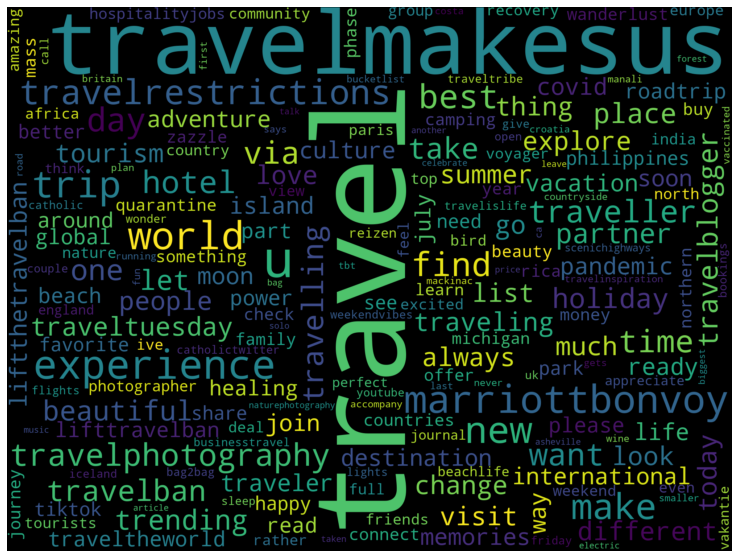

In [96]:
# most common tweet content keywords
b = ''
wc = WordCloud(width=2000, height=1500, max_font_size=350, collocations=False).generate(tweets_all_text(b))
plt.figure( figsize=(20,10) )
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()


In [97]:
#defining top count of keywords to construct chart
def top_count (b) :
    key_words = WordCloud().process_text(tweets_all_text(b))
    df_key_words = pd.DataFrame(list(key_words.items()), columns = ['keyword', 'count']).set_index('keyword')

    df_key_words.sort_values(by='count', ascending= False).head(20).plot.barh()


In [108]:
%matplotlib inline

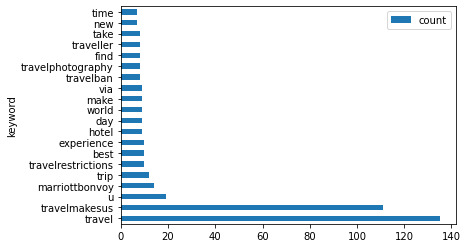

In [109]:
top_count('b')

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

## 4. Top Users Analysis

From the collected tweets, twenty top users were categorized based on the amount of favorites they had in their tweets.

The favorites category was chosen as opposed to retweets, because the numbers of favorites were larger, showing more engagement from other users towards those posts. Therefore it became important to analyze based on favorites.

In [113]:
# users producing most favorited content
df_tweets.sort_values(by='favorites', ascending=False).head(20)['user']

162        StephsMundo
115        coreywolfen
140        VIPAprilLuv
61      MishalBukhari5
171     LoveCat_Mickey
134        RitzCarlton
157       purviparwani
65       TravelShireen
180    LukeandTylerTr1
71      makariosafaris
30      carsonmarkspix
127    OneikaTraveller
130         JWMarriott
150             Westin
108         ceci_morae
129        RitzCarlton
183            WHotels
148     sheratonhotels
128      stregishotels
31         NYCapricorn
Name: user, dtype: object

In [99]:
#defining top users by number of favorites as opposed to retweets
top_users = ['StephsMundo', 'coreywolfen', 'VIPAprilLuv', 'MishalBukhari5', 'LoveCat_Mickey', 'RitzCarlton', 'purviparwani', 'TravelShireen', 'LukeandTylerTr1', 'makariosafaris', 'carsonmarkspix', 'OneikaTraveller', 'JWMarriott', 'Westin', 'ceci_morae', 'RitzCarlton', 'WHotels', 'sheratonhotels', 'stregishotels', 'NYCapricorn']

type(top_users)
top_users

['StephsMundo',
 'coreywolfen',
 'VIPAprilLuv',
 'MishalBukhari5',
 'LoveCat_Mickey',
 'RitzCarlton',
 'purviparwani',
 'TravelShireen',
 'LukeandTylerTr1',
 'makariosafaris',
 'carsonmarkspix',
 'OneikaTraveller',
 'JWMarriott',
 'Westin',
 'ceci_morae',
 'RitzCarlton',
 'WHotels',
 'sheratonhotels',
 'stregishotels',
 'NYCapricorn']

In [83]:
df_top_users = pd.DataFrame(data=top_users, columns=['Top Users'])
df_top_users

,Top Users
0,StephsMundo
1,coreywolfen
2,VIPAprilLuv
3,MishalBukhari5
4,LoveCat_Mickey
5,RitzCarlton
6,purviparwani
7,TravelShireen
8,LukeandTylerTr1
9,makariosafaris


In [110]:
#constructing table with tweets polarity per top users
def user_sentiment(uname):
    return df_tweets[df_tweets['user'] == uname]['polarity'].mean()

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

### 4.1 Top Users Sentiment Analysis

After the top twenty users have been pulled out, we calculate the mean of the polarity of their tweets, giving use the Average Sentiment of the users.

Five users had a zero as average of polarity, meaning they were neutral in their tweets.

All the other users showed positive polarity as an average which is a good for the campaign.

Once we filter out the hotel chain sub-brand accounts, we find that the sentiment numbers range between 0.07 and 0.85.

Next, we focus on the users with highest following such as Corey Wolfenbarger with more than sixteen thousand followers, Dr Purvi Parwani with twenty thousand followers, and April Luv with eighteen thousand followers.

Other important accounts to notice are Makario Safaris, an African travel agency, Oneika, Stephanie, and Luke and Tyler, all travel enthusiasts.

The positive sentiment from these users indicate that they are accounts that support the campaign and are not detractors.

The recommendation is to work with some of these accounts, especially the ones with highest following. Approaching them to help broadcast the campaign using the hashtag #travelmakesus. This will increase the number of retweets, engagement, etc.

In [112]:
# campaign sentiment comparison
df_top_users['average_sentiment'] = df_top_users['Top Users'].apply(user_sentiment)
df_top_users.sort_values(by='average_sentiment', ascending=True)

,Top Users,average_sentiment
19,NYCapricorn,0.000000
16,WHotels,0.000000
3,MishalBukhari5,0.000000
4,LoveCat_Mickey,0.000000
10,carsonmarkspix,0.000000
14,ceci_morae,0.068182
0,StephsMundo,0.237500
1,coreywolfen,0.250000
6,purviparwani,0.250000
13,Westin,0.300000


# Appendix

Top Users Twitter Account heads info

[]

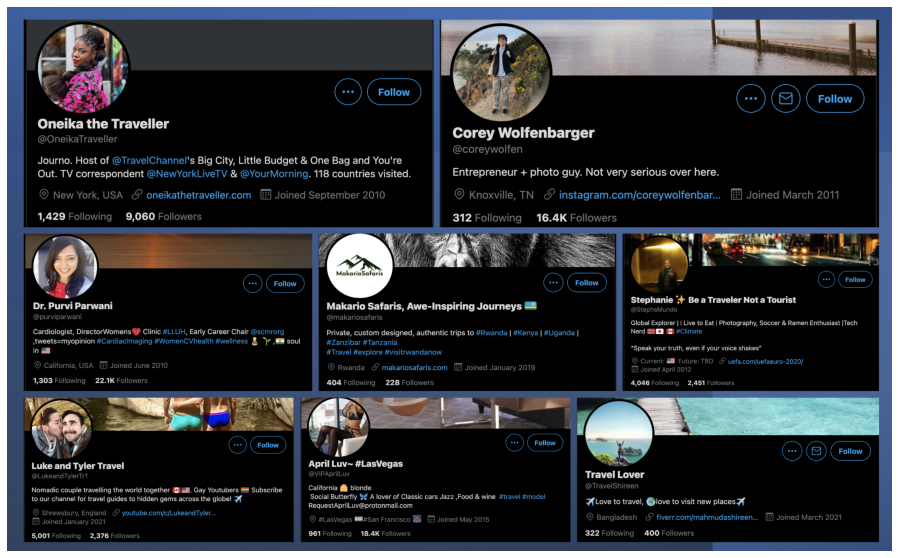

In [129]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
plt.figure(figsize=(20, 10))
image_mp= mpimg.imread(r'Top Users.png')
imgplot=plt.imshow(image_mp)
plt.axis('off')
plt.plot()

Marriott's reward program account Twitter head:

[]

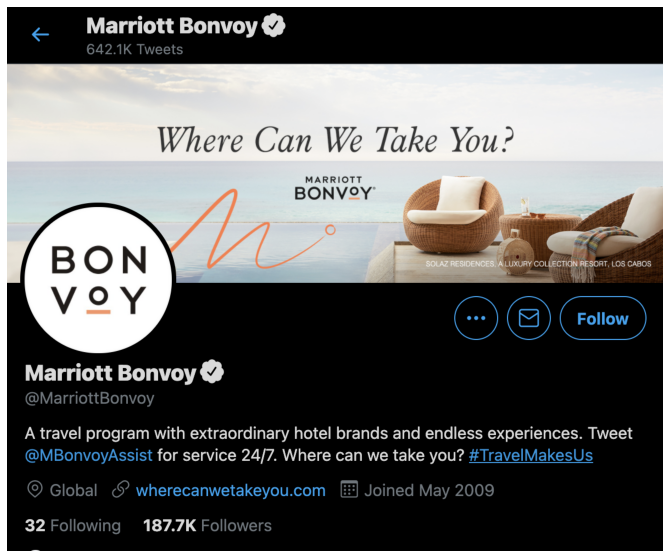

In [132]:
plt.figure(figsize=(20, 10))
image_mp= mpimg.imread(r'Marriott Bonvoy head.png')
imgplot=plt.imshow(image_mp)
plt.axis('off')
plt.plot()